# Long Short Term Memory(LSTM) based - Stock predicition - # CPU based

Aim -to predict the Opening stock price using past 60 day stock price.



In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
import matplotlib.pyplot as plt

## Data prep

In [2]:
company = 'AAPL' 

In [3]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

df = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")
df

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2011-10-04,374.570,381.8000,354.2400,372.50,44059900.0,0.0,1.0,47.964530,48.890347,45.361228,47.699462,308419300.0
1,2011-10-05,367.860,379.8200,360.3000,378.25,28088200.0,0.0,1.0,47.105299,48.636804,46.137224,48.435762,196617400.0
2,2011-10-06,373.330,384.7800,371.8045,377.37,29020800.0,0.0,1.0,47.805745,49.271943,47.610401,48.323076,203145600.0
3,2011-10-07,375.780,377.7400,368.4890,369.80,19123500.0,0.0,1.0,48.119473,48.370455,47.185844,47.353721,133864500.0
4,2011-10-10,379.090,388.8100,378.2100,388.81,15804100.0,0.0,1.0,48.543326,49.787994,48.430640,49.787994,110628700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2018-01-26,172.000,172.0000,170.0600,171.51,39143011.0,0.0,1.0,172.000000,172.000000,170.060000,171.510000,39143011.0
1589,2018-01-29,170.160,170.1600,167.0700,167.96,50640406.0,0.0,1.0,170.160000,170.160000,167.070000,167.960000,50640406.0
1590,2018-01-30,165.525,167.3700,164.7000,166.97,46048185.0,0.0,1.0,165.525000,167.370000,164.700000,166.970000,46048185.0
1591,2018-01-31,166.870,168.4417,166.5000,167.43,32478930.0,0.0,1.0,166.870000,168.441700,166.500000,167.430000,32478930.0


In [4]:
#axis defines in which directio the drop should be performed if 0 horizantally, 1 for vertical(columns)
df = df.drop(['Date', 'Dividend', 'Split', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,374.57,381.80,354.2400,372.50,44059900.0
1,367.86,379.82,360.3000,378.25,28088200.0
2,373.33,384.78,371.8045,377.37,29020800.0
3,375.78,377.74,368.4890,369.80,19123500.0
4,379.09,388.81,378.2100,388.81,15804100.0


In [5]:
#choose plotting style
plt.style.use('dark_background')
#plt.style.use('seaborn')

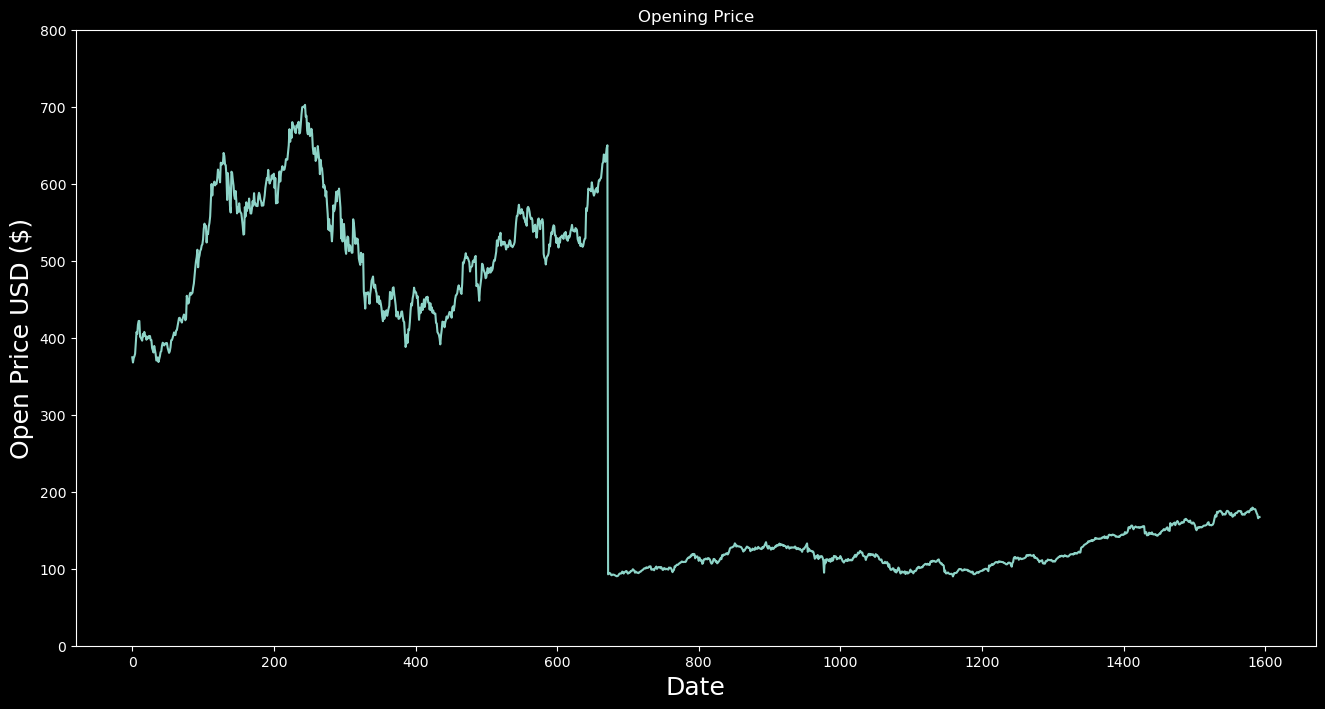

In [6]:
plt.figure(figsize=(16,8))
plt.ylim(0, 800)
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [7]:
#moving averages: statistical technique used for time series analysis
#can help to reveal the underlying trends and also used to forecast the future values 
#based on the trend identified in the data
ma100 = df.Open.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1588    166.69345
1589    166.75755
1590    166.78570
1591    166.83350
1592    166.89655
Name: Open, Length: 1593, dtype: float64

In [8]:
ma200 = df.Open.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1588    158.838337
1589    158.981137
1590    159.099212
1591    159.226162
1592    159.354938
Name: Open, Length: 1593, dtype: float64

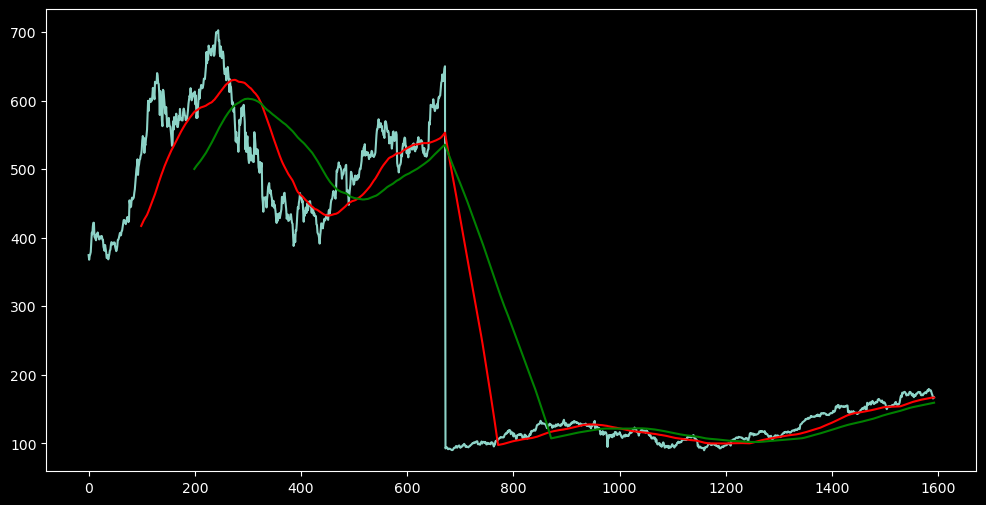

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Open)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1275

In [11]:
#Scale the data
#scaling between 0 and 1 because it improves performance and accuracy 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.46467236],
       [0.45371565],
       [0.46264757],
       ...,
       [0.12332424],
       [0.12552048],
       [0.12600219]])

In [12]:
#Create training dataset
#Create scaled training dataset

#selects the frist training_data_len rows of the scaled_data array,
# : in the second dimension indicated that all columns of the array should be included

# train_data is a 2D NumPy array containign the preprocessed and scaled data.
train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]


# 60 is the no of time steps used to predict the next time step.
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.46467236, 0.45371565, 0.46264757, 0.46664816, 0.47205304,
       0.49406443, 0.51818226, 0.51432864, 0.53367842, 0.54169592,
       0.54172858, 0.50840123, 0.50619683, 0.50309433, 0.49995918,
       0.51441028, 0.50907072, 0.5185415 , 0.51109551, 0.51014843,
       0.50196764, 0.50634379, 0.50467824, 0.5095116 , 0.50604987,
       0.50980552, 0.50124916, 0.50134714, 0.48433239, 0.47928692,
       0.47484528, 0.48864323, 0.48003788, 0.47177544, 0.4578632 ,
       0.45887559, 0.46457439, 0.45463007, 0.46104734, 0.46674613,
       0.4756454 , 0.47768652, 0.48959031, 0.4955667 , 0.49396646,
       0.4897536 , 0.49223559, 0.49452164, 0.49261116, 0.49476658,
       0.48447935, 0.4789765 , 0.47412681, 0.47757221, 0.48621022,
       0.50079195, 0.50129815, 0.50569063, 0.5112588 , 0.51744746])]
[0.5117486651099753]



In [13]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data into 3 dimensional(require input data to be in a specific format)
#number of samples
#number of time steps in input sequence
#number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1215, 60, 1)

## Model training 

In [15]:
#Build LSTM model
model=Sequential()
#Add first layer to model with 50 mem cells, and return the output sequence at each step
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons, used to extract high level features form LSTM layers
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron, used to produce the final prediction
model.add(Dense(1))

# params: no of trainable parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compile the model
#Adam (Adaptive Moment Estimation) is an optimization algorithm that is 
#commonly used in machine learning to update the parameters of neural network models during training. 

model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=5)

Epoch 1/5
1215/1215 [==============================] - 28s 20ms/step - loss: 0.0062
Epoch 2/5
1215/1215 [==============================] - 24s 20ms/step - loss: 0.0033
Epoch 3/5
1215/1215 [==============================] - 26s 22ms/step - loss: 0.0024
Epoch 4/5
1215/1215 [==============================] - 27s 22ms/step - loss: 0.0018
Epoch 5/5
1215/1215 [==============================] - 26s 22ms/step - loss: 0.0019


## Testing and Validating model

In [18]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [19]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [20]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [21]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


10/10 [==============================] - 1s 14ms/step


In [22]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



2.461553049147504

In [23]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

C:\Users\USER\AppData\Local\Temp\ipykernel_22732\1024665732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


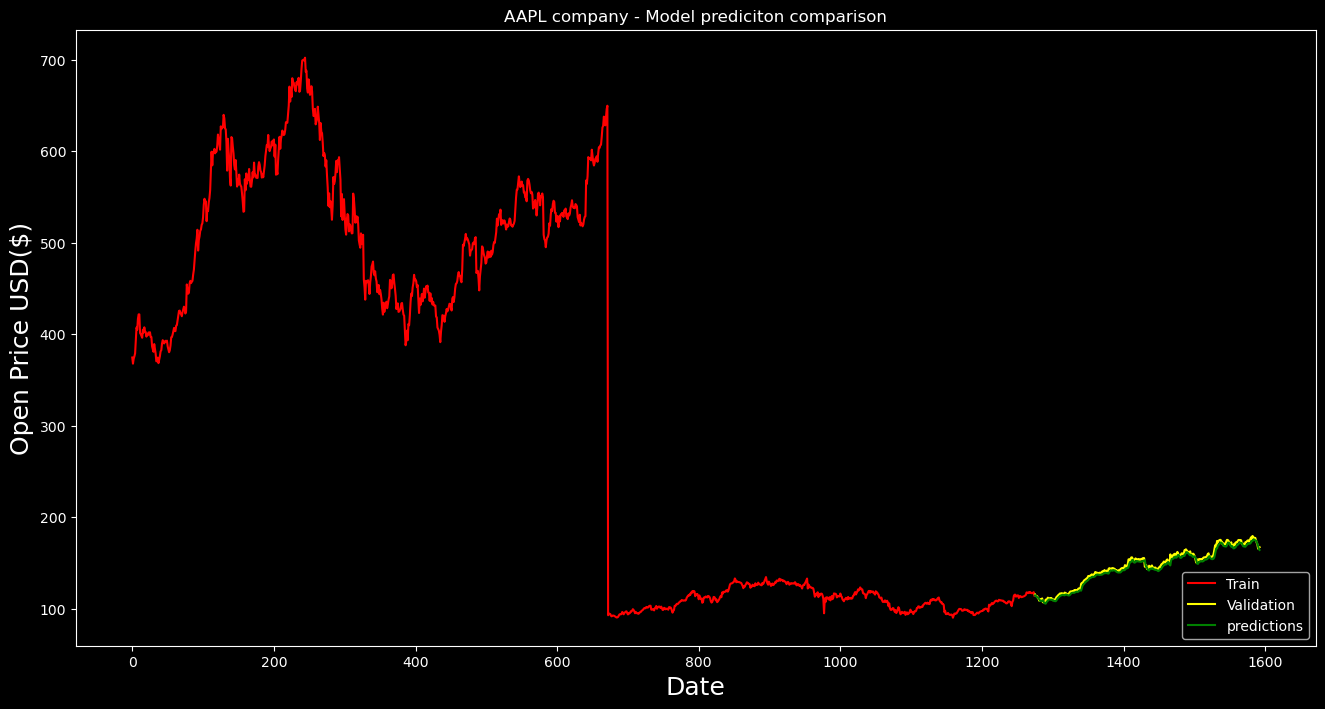

In [24]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('AAPL company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid['predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig(r'C:\Users\USER\Downloads\Stock-price-predicition-master\Images')
plt.show()



In [25]:
#Show the valid and predicted prices

valid.tail(15)

,Open,predictions
1578,174.590,170.975632
1579,176.180,171.260803
1580,177.900,172.380096
1581,176.150,173.960449
1582,179.370,173.854431
1583,178.610,175.206406
1584,177.300,175.668839
1585,177.300,175.035416
1586,177.250,174.547913
1587,174.505,174.323029


In [27]:
#Get the quote
stock_quote = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")

new_df=stock_quote.filter(['Close'])
#Get last 100 days values and convert into array
last_100_days=new_df[-100:].values

#Scale the data to be values between 0
last_100_days_scaled=scaler.transform(last_100_days)

#Create an empty list
X_test=[]
#Appemd the past 100days
X_test.append(last_100_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {company} tomorrow:{pred_price}')

1/1 [==============================] - 0s 31ms/step
Price of AAPL tomorrow:[[164.93805]]


In [28]:
stock_quote = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")

new_df=stock_quote.filter(['Close'])
# Define the number of days to predict
num_days = 30

# Get last 100 days values and convert into array
last_100_days = new_df[-100:].values

# Create an empty list
pred_prices = []

for i in range(30):
    # Scale the data to be values between 0
    last_100_days_scaled = scaler.transform(last_100_days)

    # Append the past 100 days
    X_test = []
    X_test.append(last_100_days_scaled)

    # Convert the X_test data into numpy array and reshape
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    pred_prices.append(pred_price[0][0])

    # Shift the last 100 days by 1 day
    last_100_days = np.append(last_100_days, pred_price, axis=0)[1:]

# Print the predicted prices for the next 30 days
print(f'Predicted prices for the next 30 days of {company}:')
print(pred_prices)


1/1 [==============================] - 0s 36ms/step
Predicted prices for the next 30 days of AAPL:
[164.93805, 163.66588, 162.13805, 160.56255, 158.98901, 157.43677, 155.91402, 154.42287, 152.96222, 151.52942, 150.12164, 148.73639, 147.37178, 146.02657, 144.69998, 143.39162, 142.10124, 140.82878, 139.57407, 138.33698, 137.11736, 135.91496, 134.72954, 133.56082, 132.40851, 131.27231, 130.15195, 129.04713, 127.95761, 126.883095]
